In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

In [3]:
sns.set(style='white', rc={'figure.figsize':(30,20)})

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}
plt.rc('font', **font)

sns.set(font_scale=1.5)

In [4]:
# Import Data
control = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\control.csv")
dox = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\dox.csv")

control.head()
dox.head()

,Culture,CD44,p16,p21,p38,SABG
0,Dox,13.093,50.223,2.075,33.570,22.317
1,Dox,14.819,52.013,6.323,35.040,21.258
2,Dox,12.502,48.133,4.422,33.427,21.495
3,Dox,16.721,53.619,5.075,37.328,22.350
4,Dox,17.285,49.929,5.392,37.920,23.257


In [5]:
# Concatenate Data
culture_data = pd.concat([control, dox], ignore_index=True)
culture_data.head()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data)

,Culture,CD44,p16,p21,p38,SABG
0,Control,10.919,38.994,2.197,13.048,20.583
1,Control,18.228,34.153,2.145,13.089,20.689
2,Control,12.657,33.693,2.625,12.566,20.932
3,Control,12.893,34.330,2.079,14.721,20.982
4,Control,12.688,38.876,2.182,12.936,20.844


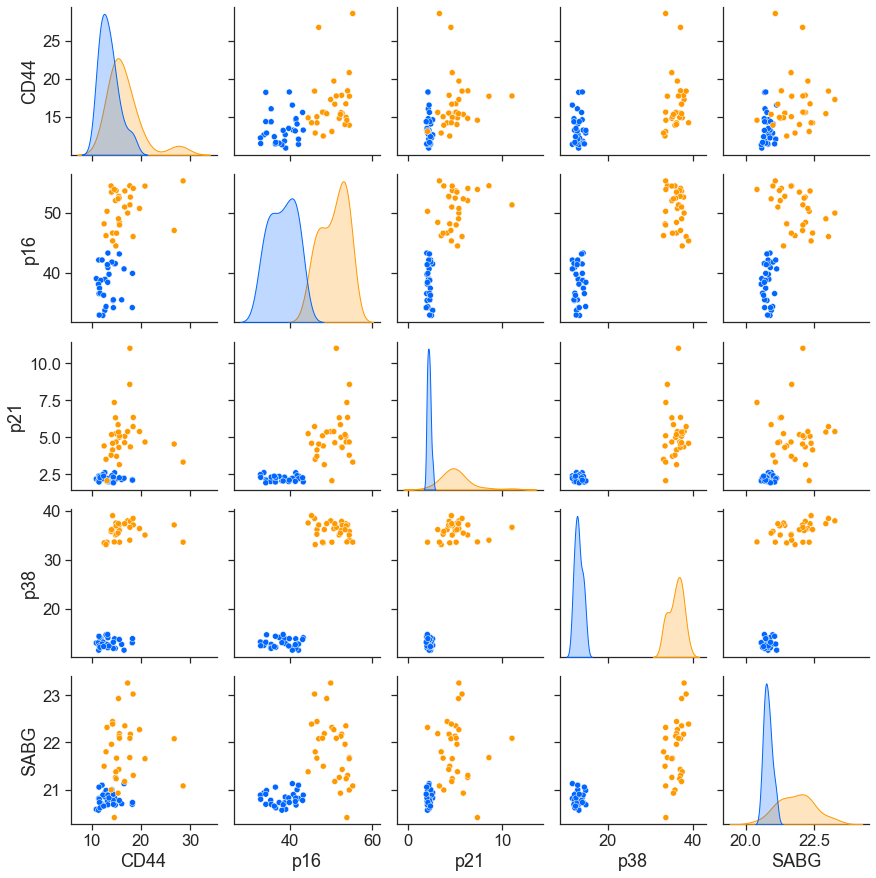

In [6]:
palette = {"Control":"#0066ff", 
           "Dox":"#ff9900"}

sns.set_style("white")
sns.set_style("ticks")

g = sns.pairplot(culture_data, hue='Culture', palette=palette)

g._legend.remove()

In [7]:
import umap

In [8]:
reducer = umap.UMAP()

In [9]:
marker_data = culture_data[["CD44", "p16", "p21", "p38", "SABG"]].values
embedding = reducer.fit_transform(marker_data)
embedding.shape

(60, 2)

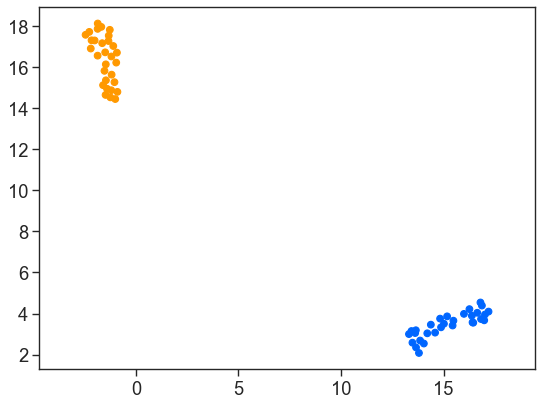

In [10]:
figure(figsize=(8, 6), dpi=80)

plt.scatter(embedding[:, 0], embedding[:, 1], c=[palette[x] for x in culture_data.Culture])
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
plt.gca().set_aspect('equal', 'datalim')

plt.savefig(fname="MSC_dox_UMAP")

In [11]:
marker_LDA = LDA(n_components=1).fit_transform(marker_data,culture_data.Culture)

In [12]:
plt.scatter(marker_LDA[:,0], marker_LDA[:, 1], c=[palette[x] for x in culture_data.Culture])

plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.gca().set_aspect('equal', 'datalim')

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
marker_PCA = PCA().fit(marker_data)

In [ ]:
target = culture_data.Culture.to_numpy()

loadings = marker_PCA.components_
marker_PCA.explained_variance_

pca_scores = PCA().fit_transform(marker_data)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=culture_data.Culture, var1=round(marker_PCA.explained_variance_ratio_[0]*100, 2), var2=round(marker_PCA.explained_variance_ratio_[1]*100, 2))